In [1]:
%matplotlib notebook

In [46]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# File path and read csv
pathFile = "Resources/glassdoor_big-data-business-analytics-company-ranking-05-06-2020-final.csv"
df = pd.read_csv(pathFile)
df

,Company Name,% of employees who would recommend this company to a friend,"% of employees who approve of the CEO as of May 6, 2020 on Glassdoor",2020 CRN 100 Categories
0,Fivetran,100%,100%,Data Management And Integration Tool
1,Matillion,100%,100%,Data Management And Integration Tool
2,Splice Machine,100%,100%,Database Systems
3,Dataiku,99%,100%,Data Science And Machine Learning Tools
4,AtScale,98%,100%,Business Analytics
...,...,...,...,...
99,Striim - 9 reviews,89%,87%,Data Management And Integration Tool
100,Tellius - 9 reviews,100%,NaN,Business Analytics
101,Timescale - 6 reviews,100%,100%,Database Systems
102,Unravel Data - 7 reviews,100%,100%,Data Management And Integration Tool


In [4]:
# df = df.set_index(["Company Name"])
# df

In [5]:
print(df.columns.tolist())

['Company Name', ' % of employees who would recommend this company to a friend ', ' % of employees who approve of the CEO as of May 6, 2020 on Glassdoor', '2020 CRN 100 Categories ']


In [6]:
df.dtypes

Company Name                                                             object
 % of employees who would recommend this company to a friend             object
 % of employees who approve of the CEO as of May 6, 2020 on Glassdoor    object
2020 CRN 100 Categories                                                  object
dtype: object

In [7]:
df[' % of employees who would recommend this company to a friend '] = df[' % of employees who would recommend this company to a friend '].str.replace("%","").astype(float)
df[' % of employees who approve of the CEO as of May 6, 2020 on Glassdoor'] = df[' % of employees who approve of the CEO as of May 6, 2020 on Glassdoor'].str.replace("%","").astype(float)
df

,Company Name,% of employees who would recommend this company to a friend,"% of employees who approve of the CEO as of May 6, 2020 on Glassdoor",2020 CRN 100 Categories
0,Fivetran,100.0,100.0,Data Management And Integration Tool
1,Matillion,100.0,100.0,Data Management And Integration Tool
2,Splice Machine,100.0,100.0,Database Systems
3,Dataiku,99.0,100.0,Data Science And Machine Learning Tools
4,AtScale,98.0,100.0,Business Analytics
...,...,...,...,...
99,Striim - 9 reviews,89.0,87.0,Data Management And Integration Tool
100,Tellius - 9 reviews,100.0,NaN,Business Analytics
101,Timescale - 6 reviews,100.0,100.0,Database Systems
102,Unravel Data - 7 reviews,100.0,100.0,Data Management And Integration Tool


In [8]:
df.dtypes

Company Name                                                              object
 % of employees who would recommend this company to a friend             float64
 % of employees who approve of the CEO as of May 6, 2020 on Glassdoor    float64
2020 CRN 100 Categories                                                   object
dtype: object

In [9]:
cleaned_df = df.dropna()
cleaned_df

,Company Name,% of employees who would recommend this company to a friend,"% of employees who approve of the CEO as of May 6, 2020 on Glassdoor",2020 CRN 100 Categories
0,Fivetran,100.0,100.0,Data Management And Integration Tool
1,Matillion,100.0,100.0,Data Management And Integration Tool
2,Splice Machine,100.0,100.0,Database Systems
3,Dataiku,99.0,100.0,Data Science And Machine Learning Tools
4,AtScale,98.0,100.0,Business Analytics
...,...,...,...,...
96,Pepperdata - 11 reviews,82.0,88.0,Data Management And Integration Tool
99,Striim - 9 reviews,89.0,87.0,Data Management And Integration Tool
101,Timescale - 6 reviews,100.0,100.0,Database Systems
102,Unravel Data - 7 reviews,100.0,100.0,Data Management And Integration Tool


In [29]:
catComp = cleaned_df[['Company Name',' % of employees who would recommend this company to a friend ', '2020 CRN 100 Categories ']]
catComp
catComp = catComp[(catComp[' % of employees who would recommend this company to a friend '] >= 80)] 
           
print(catComp.count())
catComp

Company Name                                                     43
 % of employees who would recommend this company to a friend     43
2020 CRN 100 Categories                                          43
dtype: int64


,Company Name,% of employees who would recommend this company to a friend,2020 CRN 100 Categories
0,Fivetran,100.0,Data Management And Integration Tool
1,Matillion,100.0,Data Management And Integration Tool
2,Splice Machine,100.0,Database Systems
3,Dataiku,99.0,Data Science And Machine Learning Tools
4,AtScale,98.0,Business Analytics
5,Alation,97.0,Data Management And Integration Tool
6,Diyotta,96.0,Data Management And Integration Tool
7,Collibra,95.0,Data Management And Integration Tool
8,Confluent,95.0,Data Management And Integration Tool
9,Databricks,95.0,Business Analytics


In [36]:
# df[~df.C.str.contains("XYZ")]

catCompClean = catComp[~catComp['Company Name'].str.contains("review")]
print(catCompClean.count())

catCompClean

Company Name                                                     34
 % of employees who would recommend this company to a friend     34
2020 CRN 100 Categories                                          34
dtype: int64


,Company Name,% of employees who would recommend this company to a friend,2020 CRN 100 Categories
0,Fivetran,100.0,Data Management And Integration Tool
1,Matillion,100.0,Data Management And Integration Tool
2,Splice Machine,100.0,Database Systems
3,Dataiku,99.0,Data Science And Machine Learning Tools
4,AtScale,98.0,Business Analytics
5,Alation,97.0,Data Management And Integration Tool
6,Diyotta,96.0,Data Management And Integration Tool
7,Collibra,95.0,Data Management And Integration Tool
8,Confluent,95.0,Data Management And Integration Tool
9,Databricks,95.0,Business Analytics


<IPython.core.display.Javascript object>


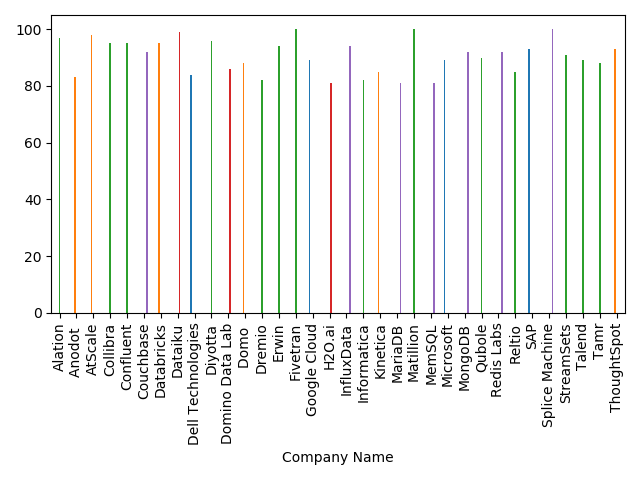

In [50]:
catCompClean.pivot('Company Name', '2020 CRN 100 Categories ',
              ' % of employees who would recommend this company to a friend ').plot(kind="bar", legend=False)
plt.tight_layout()
plt.show()